In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import yfinance as yf 
import pandas as pd

In [66]:
prv5 = yf.download('GLD','2014-05-24','2020-05-24')
prv5

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-23,124.599998,124.660004,124.190002,124.510002,124.510002,2205900
2014-05-27,122.980003,123.070000,121.750000,121.849998,121.849998,10895800
2014-05-28,121.470001,121.699997,120.919998,121.199997,121.199997,6736800
2014-05-29,120.779999,121.459999,120.769997,120.940002,120.940002,5551900
2014-05-30,120.760002,120.809998,119.620003,120.430000,120.430000,8749600
...,...,...,...,...,...,...
2020-05-18,164.330002,164.500000,162.410004,162.690002,162.690002,14137900
2020-05-19,163.600006,164.429993,163.039993,164.259995,164.259995,8535800
2020-05-20,164.539993,164.960007,163.889999,164.649994,164.649994,10666100


In [67]:
sd=prv5[["Close"]]


In [68]:
prv5_year_investment =  sd.asfreq('Y', method='pad')
prv5_year_investment

,Close
Date,
2014-12-31,113.580002
2015-12-31,101.459999
2016-12-31,109.610001
2017-12-31,123.650002
2018-12-31,121.250000
2019-12-31,142.899994


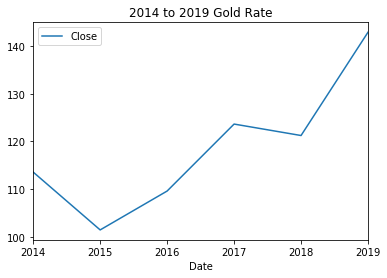

In [69]:
prv5_year_investment.plot(title="2014 to 2019 Gold Rate")

In [70]:
prv5_year_investment.sort_values(by='Date',inplace=True, ascending=True)
prv5_year_investment

,Close
Date,
2014-12-31,113.580002
2015-12-31,101.459999
2016-12-31,109.610001
2017-12-31,123.650002
2018-12-31,121.250000
2019-12-31,142.899994


In [71]:
prv5_year_investment['prev_day_close_rate'] = prv5_year_investment['Close'].shift(1)
prv5_year_investment.head()

,Close,prev_day_close_rate
Date,,
2014-12-31,113.580002,NaN
2015-12-31,101.459999,113.580002
2016-12-31,109.610001,101.459999
2017-12-31,123.650002,109.610001
2018-12-31,121.250000,123.650002


In [72]:
prv5_year_investment["%change"]=100*(prv5_year_investment["Close"]-prv5_year_investment["prev_day_close_rate"])/prv5_year_investment["prev_day_close_rate"]
prv5_year_investment

,Close,prev_day_close_rate,%change
Date,,,
2014-12-31,113.580002,NaN,NaN
2015-12-31,101.459999,113.580002,-10.670895
2016-12-31,109.610001,101.459999,8.032724
2017-12-31,123.650002,109.610001,12.809051
2018-12-31,121.250000,123.650002,-1.940964
2019-12-31,142.899994,121.250000,17.855665


In [73]:
prv5_year_investment['positive'] = prv5_year_investment['%change'] > 0

In [74]:
prv5_year_investment

,Close,prev_day_close_rate,%change,positive
Date,,,,
2014-12-31,113.580002,NaN,NaN,False
2015-12-31,101.459999,113.580002,-10.670895,False
2016-12-31,109.610001,101.459999,8.032724,True
2017-12-31,123.650002,109.610001,12.809051,True
2018-12-31,121.250000,123.650002,-1.940964,False
2019-12-31,142.899994,121.250000,17.855665,True


In [75]:
prv5_year_investment.dropna(how='any') 

,Close,prev_day_close_rate,%change,positive
Date,,,,
2015-12-31,101.459999,113.580002,-10.670895,False
2016-12-31,109.610001,101.459999,8.032724,True
2017-12-31,123.650002,109.610001,12.809051,True
2018-12-31,121.250000,123.650002,-1.940964,False
2019-12-31,142.899994,121.250000,17.855665,True


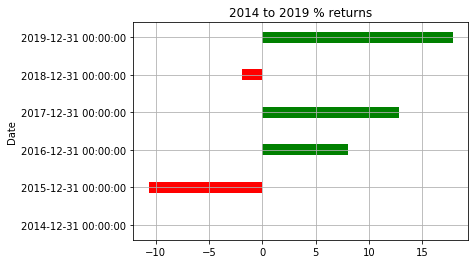

In [76]:
prv5_year_investment["%change"].plot(kind='barh',title="2014 to 2019 % returns",color=prv5_year_investment.positive.map({True: 'g', False: 'r'}),grid=True,width=.3)

In [94]:
prv5_year_investment["%change"].mean()

5.217116264181998

In [6]:
#MOnthly Investment
data = yf.download('GLD','2000-05-24','2020-05-24')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-18,44.430000,44.490002,44.070000,44.380001,44.380001,5992000
2004-11-19,44.490002,44.919998,44.470001,44.779999,44.779999,11655300
2004-11-22,44.750000,44.970001,44.740002,44.950001,44.950001,11996000
2004-11-23,44.880001,44.919998,44.720001,44.750000,44.750000,3169200
2004-11-24,44.930000,45.049999,44.790001,45.049999,45.049999,6105100


In [8]:
df1=data[["Close"]]
df1

,Close
Date,
2004-11-18,44.380001
2004-11-19,44.779999
2004-11-22,44.950001
2004-11-23,44.750000
2004-11-24,45.049999
...,...
2020-05-18,162.690002
2020-05-19,164.259995
2020-05-20,164.649994


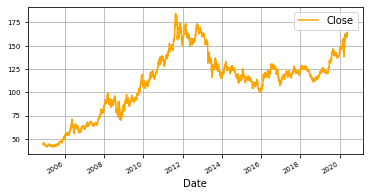

In [9]:
df1.plot(kind='line',color="orange",grid=True,figsize=(6,3),fontsize=7)

In [10]:
monthly_investment =  df1.resample('BMS').first()
monthly_investment.head()

,Close
Date,
2004-11-01,44.380001
2004-12-01,45.380001
2005-01-03,43.020000
2005-02-01,42.099998
2005-03-01,43.220001


In [11]:
monthly_investment.sort_values(by='Date',inplace=True, ascending=True)
monthly_investment.head()

,Close
Date,
2004-11-01,44.380001
2004-12-01,45.380001
2005-01-03,43.020000
2005-02-01,42.099998
2005-03-01,43.220001


In [12]:
monthly_investment['prev_day_close_rate'] = monthly_investment['Close'].shift(1)
monthly_investment.head()

,Close,prev_day_close_rate
Date,,
2004-11-01,44.380001,NaN
2004-12-01,45.380001,44.380001
2005-01-03,43.020000,45.380001
2005-02-01,42.099998,43.020000
2005-03-01,43.220001,42.099998


In [13]:
monthly_investment["%change"]=100*(monthly_investment["Close"]-monthly_investment["prev_day_close_rate"])/monthly_investment["prev_day_close_rate"]
monthly_investment.head()

,Close,prev_day_close_rate,%change
Date,,,
2004-11-01,44.380001,NaN,NaN
2004-12-01,45.380001,44.380001,2.253267
2005-01-03,43.020000,45.380001,-5.200530
2005-02-01,42.099998,43.020000,-2.138545
2005-03-01,43.220001,42.099998,2.660339


In [14]:
monthly_investment['positive'] = monthly_investment['%change'] > 0
monthly_investment.head()

,Close,prev_day_close_rate,%change,positive
Date,,,,
2004-11-01,44.380001,NaN,NaN,False
2004-12-01,45.380001,44.380001,2.253267,True
2005-01-03,43.020000,45.380001,-5.200530,False
2005-02-01,42.099998,43.020000,-2.138545,False
2005-03-01,43.220001,42.099998,2.660339,True


In [15]:
monthly_investment.dropna(how='any') 

,Close,prev_day_close_rate,%change,positive
Date,,,,
2004-12-01,45.380001,44.380001,2.253267,True
2005-01-03,43.020000,45.380001,-5.200530,False
2005-02-01,42.099998,43.020000,-2.138545,False
2005-03-01,43.220001,42.099998,2.660339,True
2005-04-01,42.619999,43.220001,-1.388251,False
...,...,...,...,...
2020-01-01,143.949997,137.789993,4.470574,True
2020-02-03,148.360001,143.949997,3.063566,True
2020-03-02,149.199997,148.360001,0.566188,True


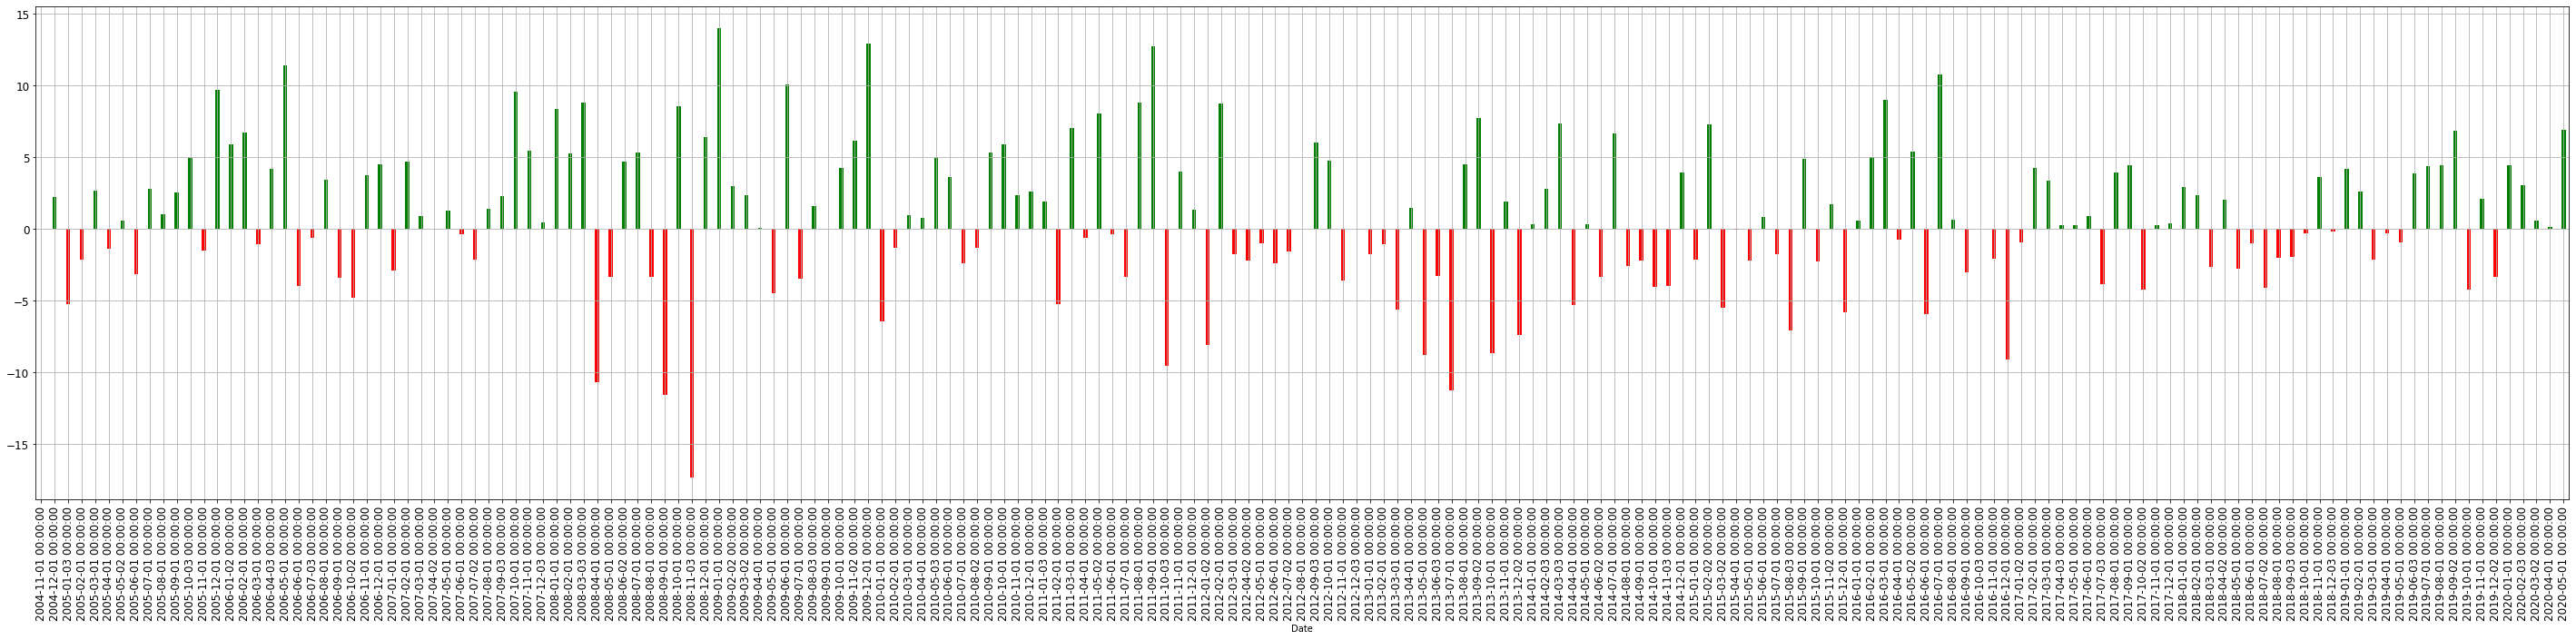

In [30]:
monthly_investment["%change"].plot(kind='bar',color=monthly_investment.positive.map({True: 'g', False: 'r'}),grid=True,width=.3,figsize=(50,10),fontsize=12)

In [105]:
monthly_investment["%change"].mean()

0.8155578939114828

In [32]:
#Quaterly_investment
Quaterly_investment =  df1.asfreq('Q', method='pad')
Quaterly_investment.head()

,Close
Date,
2004-12-31,43.799999
2005-03-31,42.820000
2005-06-30,43.439999
2005-09-30,46.700001
2005-12-31,51.580002


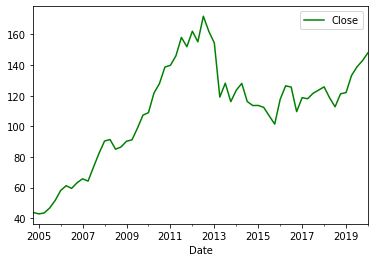

In [33]:
Quaterly_investment.plot(color="green")

In [108]:
Quaterly_investment.sort_values(by='Date',inplace=True, ascending=True)
Quaterly_investment

,Close
Date,
2004-12-31,43.799999
2005-03-31,42.820000
2005-06-30,43.439999
2005-09-30,46.700001
2005-12-31,51.580002
...,...
2019-03-31,122.010002
2019-06-30,133.199997
2019-09-30,138.869995


In [109]:
Quaterly_investment['prev_day_close_rate'] = Quaterly_investment['Close'].shift(1)
Quaterly_investment.head()

,Close,prev_day_close_rate
Date,,
2004-12-31,43.799999,NaN
2005-03-31,42.820000,43.799999
2005-06-30,43.439999,42.820000
2005-09-30,46.700001,43.439999
2005-12-31,51.580002,46.700001


In [110]:
Quaterly_investment["%change"]=100*(Quaterly_investment["Close"]-Quaterly_investment["prev_day_close_rate"])/Quaterly_investment["prev_day_close_rate"]
Quaterly_investment

,Close,prev_day_close_rate,%change
Date,,,
2004-12-31,43.799999,NaN,NaN
2005-03-31,42.820000,43.799999,-2.237442
2005-06-30,43.439999,42.820000,1.447919
2005-09-30,46.700001,43.439999,7.504609
2005-12-31,51.580002,46.700001,10.449681
...,...,...,...
2019-03-31,122.010002,121.250000,0.626806
2019-06-30,133.199997,122.010002,9.171375
2019-09-30,138.869995,133.199997,4.256755


In [111]:
Quaterly_investment['positive'] = Quaterly_investment['%change'] > 0
Quaterly_investment.head()

,Close,prev_day_close_rate,%change,positive
Date,,,,
2004-12-31,43.799999,NaN,NaN,False
2005-03-31,42.820000,43.799999,-2.237442,False
2005-06-30,43.439999,42.820000,1.447919,True
2005-09-30,46.700001,43.439999,7.504609,True
2005-12-31,51.580002,46.700001,10.449681,True


In [112]:
Quaterly_investment.dropna(how="any")

,Close,prev_day_close_rate,%change,positive
Date,,,,
2005-03-31,42.820000,43.799999,-2.237442,False
2005-06-30,43.439999,42.820000,1.447919,True
2005-09-30,46.700001,43.439999,7.504609,True
2005-12-31,51.580002,46.700001,10.449681,True
2006-03-31,58.099998,51.580002,12.640551,True
...,...,...,...,...
2019-03-31,122.010002,121.250000,0.626806,True
2019-06-30,133.199997,122.010002,9.171375,True
2019-09-30,138.869995,133.199997,4.256755,True


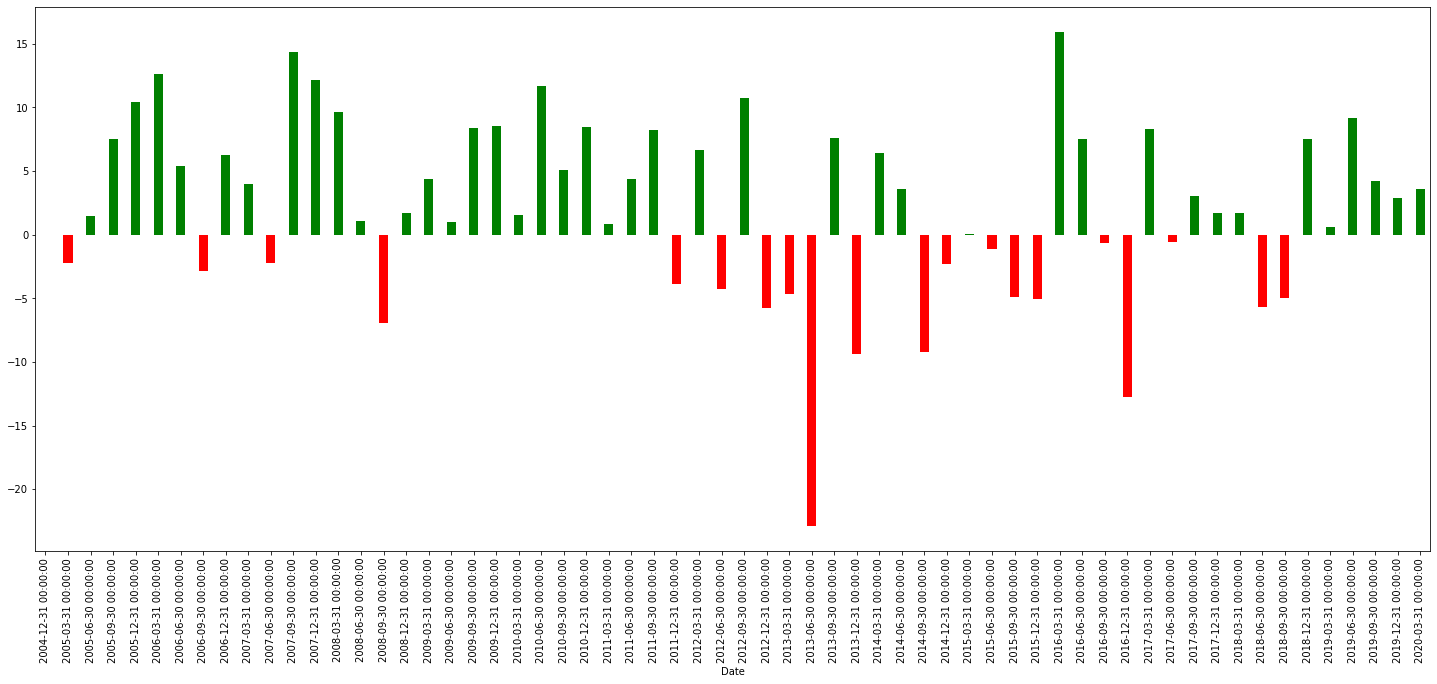

In [113]:
Quaterly_investment["%change"].plot(kind='bar',color=Quaterly_investment.positive.map({True: 'g', False: 'r'}),width=.4,figsize=(25,10),fontsize=10)

In [114]:
Quaterly_investment["%change"].mean()

2.2688664781778276

In [81]:
#Half_investment
Half_investment =  df1.asfreq('2Q', method='pad')
Half_investment.head()

,Close
Date,
2004-12-31,43.799999
2005-06-30,43.439999
2005-12-31,51.580002
2006-06-30,61.230000
2006-12-31,63.209999


In [115]:
#Half_investment
Half_investment =  df1.asfreq('2Q', method='pad')
Half_investment.head()

,Close
Date,
2004-12-31,43.799999
2005-06-30,43.439999
2005-12-31,51.580002
2006-06-30,61.230000
2006-12-31,63.209999


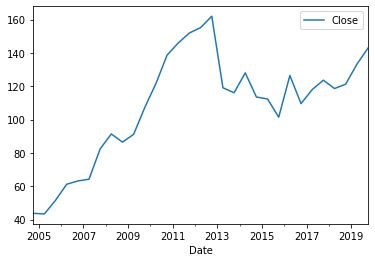

In [116]:
Half_investment.plot()

In [132]:
Half_investment.sort_values(by='Date',inplace=True, ascending=True)
Half_investment.head()

,Close,prev_day_close_rate,%change,positive
Date,,,,
2004-12-31,43.799999,NaN,NaN,False
2005-06-30,43.439999,43.799999,-0.821919,False
2005-12-31,51.580002,43.439999,18.738498,True
2006-06-30,61.230000,51.580002,18.708797,True
2006-12-31,63.209999,61.230000,3.233708,True


In [120]:
Half_investment['prev_day_close_rate'] = Half_investment['Close'].shift(1)
Half_investment.head()

,Close,prev_day_close_rate
Date,,
2004-12-31,43.799999,NaN
2005-06-30,43.439999,43.799999
2005-12-31,51.580002,43.439999
2006-06-30,61.230000,51.580002
2006-12-31,63.209999,61.230000


In [121]:
Half_investment["%change"]=100*(Half_investment["Close"]-Half_investment["prev_day_close_rate"])/Half_investment["prev_day_close_rate"]
Half_investment

,Close,prev_day_close_rate,%change
Date,,,
2004-12-31,43.799999,NaN,NaN
2005-06-30,43.439999,43.799999,-0.821919
2005-12-31,51.580002,43.439999,18.738498
2006-06-30,61.230000,51.580002,18.708797
2006-12-31,63.209999,61.230000,3.233708
2007-06-30,64.269997,63.209999,1.676946
2007-12-31,82.459999,64.269997,28.302479
2008-06-30,91.400002,82.459999,10.841623
2008-12-31,86.519997,91.400002,-5.339174


In [122]:
Half_investment['positive'] = Half_investment['%change'] > 0
Half_investment.head()

,Close,prev_day_close_rate,%change,positive
Date,,,,
2004-12-31,43.799999,NaN,NaN,False
2005-06-30,43.439999,43.799999,-0.821919,False
2005-12-31,51.580002,43.439999,18.738498,True
2006-06-30,61.230000,51.580002,18.708797,True
2006-12-31,63.209999,61.230000,3.233708,True


In [123]:
Half_investment.dropna(how="any")

,Close,prev_day_close_rate,%change,positive
Date,,,,
2005-06-30,43.439999,43.799999,-0.821919,False
2005-12-31,51.580002,43.439999,18.738498,True
2006-06-30,61.230000,51.580002,18.708797,True
2006-12-31,63.209999,61.230000,3.233708,True
2007-06-30,64.269997,63.209999,1.676946,True
2007-12-31,82.459999,64.269997,28.302479,True
2008-06-30,91.400002,82.459999,10.841623,True
2008-12-31,86.519997,91.400002,-5.339174,False
2009-06-30,91.180000,86.519997,5.386042,True


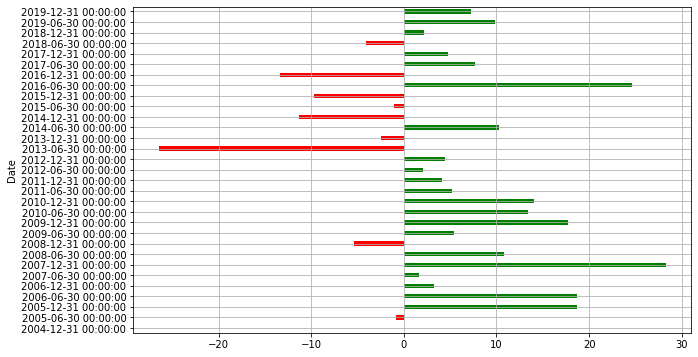

In [130]:
Half_investment["%change"].plot(kind='barh',color=Half_investment.positive.map({True: 'g', False: 'r'}),width=.4,grid=True,figsize=(10,6),fontsize=10)

In [131]:
Half_investment["%change"].mean()

4.6639977996108835

In [135]:
#Yearly_investment
Yearly_investment =  df1.asfreq('Y', method='pad')
Yearly_investment

,Close
Date,
2004-12-31,43.799999
2005-12-31,51.580002
2006-12-31,63.209999
2007-12-31,82.459999
2008-12-31,86.519997
2009-12-31,107.309998
2010-12-31,138.720001
2011-12-31,151.990005
2012-12-31,162.020004


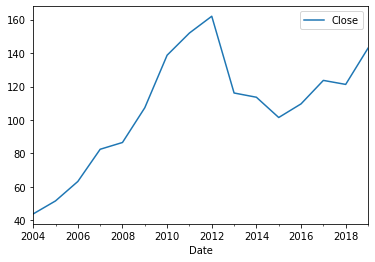

In [136]:
Yearly_investment.plot()

In [137]:
Yearly_investment.sort_values(by='Date',inplace=True, ascending=True)
Yearly_investment.head()

,Close
Date,
2004-12-31,43.799999
2005-12-31,51.580002
2006-12-31,63.209999
2007-12-31,82.459999
2008-12-31,86.519997


In [138]:
Yearly_investment['prev_day_close_rate'] = Yearly_investment['Close'].shift(1)
Yearly_investment.head()

,Close,prev_day_close_rate
Date,,
2004-12-31,43.799999,NaN
2005-12-31,51.580002,43.799999
2006-12-31,63.209999,51.580002
2007-12-31,82.459999,63.209999
2008-12-31,86.519997,82.459999


In [139]:
Yearly_investment["%change"]=100*(Yearly_investment["Close"]-Yearly_investment["prev_day_close_rate"])/Yearly_investment["prev_day_close_rate"]
Yearly_investment.head()

,Close,prev_day_close_rate,%change
Date,,,
2004-12-31,43.799999,NaN,NaN
2005-12-31,51.580002,43.799999,17.762563
2006-12-31,63.209999,51.580002,22.547493
2007-12-31,82.459999,63.209999,30.454043
2008-12-31,86.519997,82.459999,4.923596


In [140]:
Yearly_investment['positive'] = Yearly_investment['%change'] > 0
Yearly_investment.head()

,Close,prev_day_close_rate,%change,positive
Date,,,,
2004-12-31,43.799999,NaN,NaN,False
2005-12-31,51.580002,43.799999,17.762563,True
2006-12-31,63.209999,51.580002,22.547493,True
2007-12-31,82.459999,63.209999,30.454043,True
2008-12-31,86.519997,82.459999,4.923596,True


In [141]:
Yearly_investment.dropna(how="any")

,Close,prev_day_close_rate,%change,positive
Date,,,,
2005-12-31,51.580002,43.799999,17.762563,True
2006-12-31,63.209999,51.580002,22.547493,True
2007-12-31,82.459999,63.209999,30.454043,True
2008-12-31,86.519997,82.459999,4.923596,True
2009-12-31,107.309998,86.519997,24.029128,True
2010-12-31,138.720001,107.309998,29.270342,True
2011-12-31,151.990005,138.720001,9.566035,True
2012-12-31,162.020004,151.990005,6.599117,True
2013-12-31,116.120003,162.020004,-28.329836,False


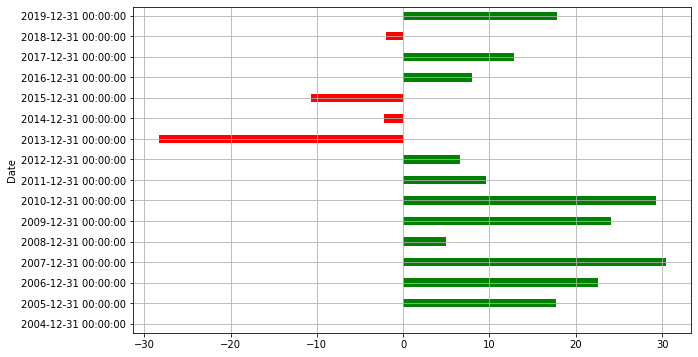

In [142]:
Yearly_investment["%change"].plot(kind='barh',color=Yearly_investment.positive.map({True: 'g', False: 'r'}),width=.4,grid=True,figsize=(10,6),fontsize=10)

In [143]:
Yearly_investment["%change"].mean()

9.3813780355964

In [35]:
#2Yearly_investment
Two_Yearly_investment =  df1.asfreq('2Y', method='pad')
Two_Yearly_investment

,Close
Date,
2004-12-31,43.799999
2006-12-31,63.209999
2008-12-31,86.519997
2010-12-31,138.720001
2012-12-31,162.020004
2014-12-31,113.580002
2016-12-31,109.610001
2018-12-31,121.250000


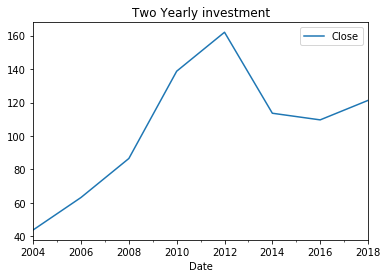

In [38]:
Two_Yearly_investment.plot(title="Two Yearly investment")

In [40]:
Two_Yearly_investment.sort_values(by='Date',inplace=True, ascending=True)
Two_Yearly_investment.head()

,Close
Date,
2004-12-31,43.799999
2006-12-31,63.209999
2008-12-31,86.519997
2010-12-31,138.720001
2012-12-31,162.020004


In [41]:
Two_Yearly_investment['prev_day_close_rate'] = Two_Yearly_investment['Close'].shift(1)
Two_Yearly_investment.head()

,Close,prev_day_close_rate
Date,,
2004-12-31,43.799999,NaN
2006-12-31,63.209999,43.799999
2008-12-31,86.519997,63.209999
2010-12-31,138.720001,86.519997
2012-12-31,162.020004,138.720001


In [42]:
Two_Yearly_investment["%change"]=100*(Two_Yearly_investment["Close"]-Two_Yearly_investment["prev_day_close_rate"])/Two_Yearly_investment["prev_day_close_rate"]
Two_Yearly_investment.head()

,Close,prev_day_close_rate,%change
Date,,,
2004-12-31,43.799999,NaN,NaN
2006-12-31,63.209999,43.799999,44.315069
2008-12-31,86.519997,63.209999,36.877073
2010-12-31,138.720001,86.519997,60.332879
2012-12-31,162.020004,138.720001,16.796427


In [43]:
Two_Yearly_investment['positive'] = Two_Yearly_investment['%change'] > 0
Two_Yearly_investment.head()

,Close,prev_day_close_rate,%change,positive
Date,,,,
2004-12-31,43.799999,NaN,NaN,False
2006-12-31,63.209999,43.799999,44.315069,True
2008-12-31,86.519997,63.209999,36.877073,True
2010-12-31,138.720001,86.519997,60.332879,True
2012-12-31,162.020004,138.720001,16.796427,True


In [44]:
Two_Yearly_investment.dropna(how="any")

,Close,prev_day_close_rate,%change,positive
Date,,,,
2006-12-31,63.209999,43.799999,44.315069,True
2008-12-31,86.519997,63.209999,36.877073,True
2010-12-31,138.720001,86.519997,60.332879,True
2012-12-31,162.020004,138.720001,16.796427,True
2014-12-31,113.580002,162.020004,-29.897544,False
2016-12-31,109.610001,113.580002,-3.495335,False
2018-12-31,121.250000,109.610001,10.619468,True


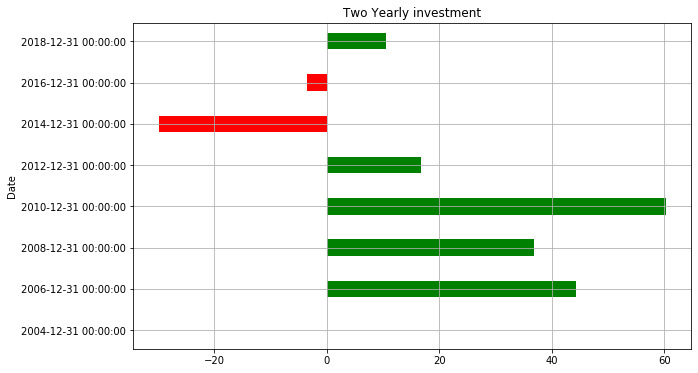

In [45]:
Two_Yearly_investment["%change"].plot(kind='barh',title="Two Yearly investment",color=Two_Yearly_investment.positive.map({True: 'g', False: 'r'}),width=.4,grid=True,figsize=(10,6),fontsize=10)

In [46]:
Two_Yearly_investment["%change"].mean()

19.36400523199149

In [47]:
#3Yearly_investment
Three_Yearly_investment =  df1.asfreq('3Y', method='pad')
Three_Yearly_investment

,Close
Date,
2004-12-31,43.799999
2007-12-31,82.459999
2010-12-31,138.720001
2013-12-31,116.120003
2016-12-31,109.610001
2019-12-31,142.899994


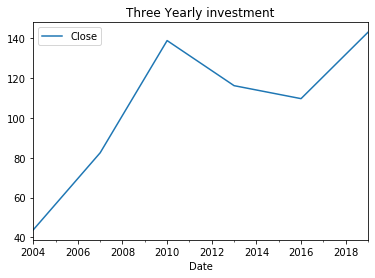

In [48]:
Three_Yearly_investment.plot(title="Three Yearly investment")

In [49]:
Three_Yearly_investment.sort_values(by='Date',inplace=True, ascending=True)
Three_Yearly_investment.head()

,Close
Date,
2004-12-31,43.799999
2007-12-31,82.459999
2010-12-31,138.720001
2013-12-31,116.120003
2016-12-31,109.610001


In [50]:
Three_Yearly_investment['prev_day_close_rate'] = Three_Yearly_investment['Close'].shift(1)
Three_Yearly_investment.head()

,Close,prev_day_close_rate
Date,,
2004-12-31,43.799999,NaN
2007-12-31,82.459999,43.799999
2010-12-31,138.720001,82.459999
2013-12-31,116.120003,138.720001
2016-12-31,109.610001,116.120003


In [51]:
Three_Yearly_investment["%change"]=100*(Three_Yearly_investment["Close"]-Three_Yearly_investment["prev_day_close_rate"])/Three_Yearly_investment["prev_day_close_rate"]
Three_Yearly_investment.head()

,Close,prev_day_close_rate,%change
Date,,,
2004-12-31,43.799999,NaN,NaN
2007-12-31,82.459999,43.799999,88.264841
2010-12-31,138.720001,82.459999,68.227023
2013-12-31,116.120003,138.720001,-16.291810
2016-12-31,109.610001,116.120003,-5.606271


In [52]:
Three_Yearly_investment['positive'] = Three_Yearly_investment['%change'] > 0
Three_Yearly_investment.head()

,Close,prev_day_close_rate,%change,positive
Date,,,,
2004-12-31,43.799999,NaN,NaN,False
2007-12-31,82.459999,43.799999,88.264841,True
2010-12-31,138.720001,82.459999,68.227023,True
2013-12-31,116.120003,138.720001,-16.291810,False
2016-12-31,109.610001,116.120003,-5.606271,False


In [53]:
Three_Yearly_investment.dropna(how="any")

,Close,prev_day_close_rate,%change,positive
Date,,,,
2007-12-31,82.459999,43.799999,88.264841,True
2010-12-31,138.720001,82.459999,68.227023,True
2013-12-31,116.120003,138.720001,-16.291810,False
2016-12-31,109.610001,116.120003,-5.606271,False
2019-12-31,142.899994,109.610001,30.371310,True


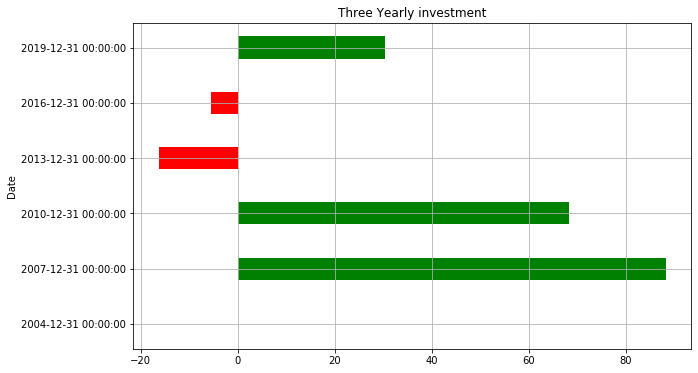

In [54]:
Three_Yearly_investment["%change"].plot(kind='barh',title="Three Yearly investment",color=Three_Yearly_investment.positive.map({True: 'g', False: 'r'}),width=.4,grid=True,figsize=(10,6),fontsize=10)

In [55]:
Three_Yearly_investment["%change"].mean()

32.993018677962475

In [56]:
#5Yearly_investment
Five_Yearly_investment =  df1.asfreq('5Y', method='pad')
Five_Yearly_investment

,Close
Date,
2004-12-31,43.799999
2009-12-31,107.309998
2014-12-31,113.580002
2019-12-31,142.899994


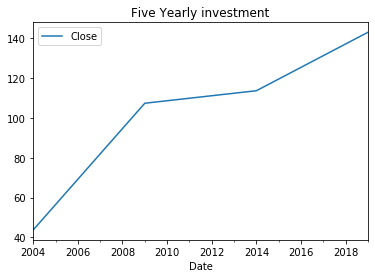

In [57]:
Five_Yearly_investment.plot(title="Five Yearly investment")

In [58]:
Five_Yearly_investment.sort_values(by='Date',inplace=True, ascending=True)
Five_Yearly_investment.head()

,Close
Date,
2004-12-31,43.799999
2009-12-31,107.309998
2014-12-31,113.580002
2019-12-31,142.899994


In [59]:
Five_Yearly_investment['prev_day_close_rate'] = Five_Yearly_investment['Close'].shift(1)
Five_Yearly_investment.head()

,Close,prev_day_close_rate
Date,,
2004-12-31,43.799999,NaN
2009-12-31,107.309998,43.799999
2014-12-31,113.580002,107.309998
2019-12-31,142.899994,113.580002


In [60]:
Five_Yearly_investment["%change"]=100*(Five_Yearly_investment["Close"]-Five_Yearly_investment["prev_day_close_rate"])/Five_Yearly_investment["prev_day_close_rate"]
Five_Yearly_investment.head()

,Close,prev_day_close_rate,%change
Date,,,
2004-12-31,43.799999,NaN,NaN
2009-12-31,107.309998,43.799999,144.999999
2014-12-31,113.580002,107.309998,5.842889
2019-12-31,142.899994,113.580002,25.814397


In [61]:
Five_Yearly_investment['positive'] = Five_Yearly_investment['%change'] > 0
Five_Yearly_investment.head()

,Close,prev_day_close_rate,%change,positive
Date,,,,
2004-12-31,43.799999,NaN,NaN,False
2009-12-31,107.309998,43.799999,144.999999,True
2014-12-31,113.580002,107.309998,5.842889,True
2019-12-31,142.899994,113.580002,25.814397,True


In [62]:
Five_Yearly_investment.dropna(how="any")

,Close,prev_day_close_rate,%change,positive
Date,,,,
2009-12-31,107.309998,43.799999,144.999999,True
2014-12-31,113.580002,107.309998,5.842889,True
2019-12-31,142.899994,113.580002,25.814397,True


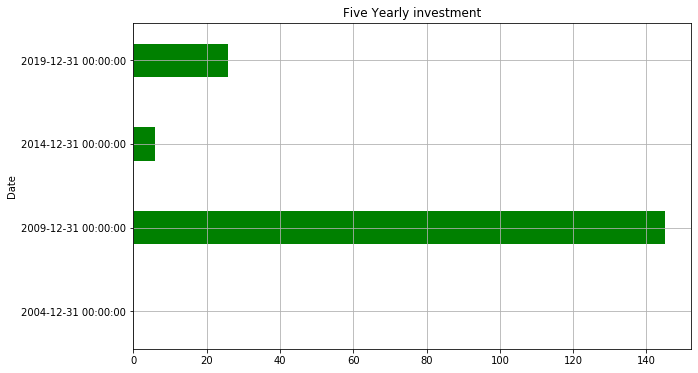

In [63]:
Five_Yearly_investment["%change"].plot(kind='barh',title="Five Yearly investment",color=Five_Yearly_investment.positive.map({True: 'g', False: 'r'}),width=.4,grid=True,figsize=(10,6),fontsize=10)

In [180]:
Five_Yearly_investment["%change"].mean()

58.885761483167016